In [126]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
#Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist #Librairie dataset
(images, targets), (_, _) = fashion_mnist.load_data() #On ignore les informations avec _
images = images[:10000] #On ne prend pas tout le dataset pour aller plus vite
targets = targets[:10000]


from sklearn.preprocessing import StandardScaler
images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)


print("Shape des images : ", images.shape)
print("\nShape de notre liste de classification : ", targets.shape)
#print(images[0]) #Tableau 2D de niveau de gris (0 a 255)
#print(targets[0]) #Numero de la classe

Shape des images :  (10000, 784)

Shape de notre liste de classification :  (10000,)


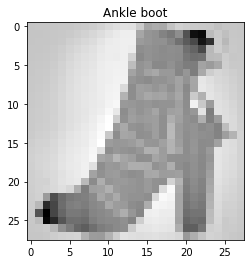

In [128]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bad", "Ankle boot"]
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

In [129]:
#print(images[10][0]) #Affiche première ligne de l'image 10
#print(targets_names[targets[10]]) #Type de cette image

In [130]:
#On veut creer un reseau de neurone avec 784 input
print("Taille pixel image : ", images[0].size)
#On veut 2 layers dont la premiere a 256 neurones et la deuxieme 128
#Notre output layer aura 10 neurones car 10 types de classification
print("\nNombre de classificiation : ", len(targets_names))

Taille pixel image :  784

Nombre de classificiation :  10


In [131]:
#Comment formater les données en input
#model = tf.keras.models.Sequential() #On creer un model sequentiel
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #On flatten notre image 28 par 28
#print("Shape avant flatten : ", images[0:1].shape) #On voit ici qu'elle est en 2D
#model_output = model.predict(images[0:1])
#print("Shape après flatten : ", model_output.shape) #On voit ici qu'elle a bien été flatten

In [132]:
#Formatage des donnees en input
model = tf.keras.models.Sequential() #Chaque neurones d'une couche C est connecte a chaque neurones de la couche C-1
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #Nouvelle shape 28*28 en entree

In [133]:
#Ajout des layers
model.add(tf.keras.layers.Dense(256, activation="relu")) #256 neurones, fonction activation ReLU
model.add(tf.keras.layers.Dense(128, activation="relu")) #128 neurones, fonction activation ReLU
#10 neurones output car 10 types de classification, activation softmax pour distribution normal probabiliste
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [134]:
#Tentative de prediction
#model_output = model.predict(images[3:4])
#print("Prediction du type de l'image : ", model_output) 
#print("\nType de l'image", targets[3:4])

In [135]:
#On peut afficher un resume du model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [136]:
#Compilation du model
model.compile(
    loss="sparse_categorical_crossentropy",  #Fonction de perte
    optimizer="sgd",                         #Optimisation stochastic gradient descent
    metrics=["accuracy"]                     #Accuracy est la metrique que l'on veut utiliser
)

In [137]:
#Entrainement du model
history = model.fit(images, targets, epochs=10) #On passe 10 fois sur l'entierete du datasat

Epoch 1/10
313/313 [==============================] - 0s 761us/step - loss: 1.1347 - accuracy: 0.6411
Epoch 2/10
313/313 [==============================] - 0s 793us/step - loss: 0.5117 - accuracy: 0.8237
Epoch 3/10
313/313 [==============================] - 0s 779us/step - loss: 0.4298 - accuracy: 0.8509
Epoch 4/10
313/313 [==============================] - 0s 775us/step - loss: 0.3836 - accuracy: 0.8656
Epoch 5/10
313/313 [==============================] - 0s 824us/step - loss: 0.3587 - accuracy: 0.8773
Epoch 6/10
313/313 [==============================] - 0s 790us/step - loss: 0.3249 - accuracy: 0.8892
Epoch 7/10
313/313 [==============================] - 0s 770us/step - loss: 0.3049 - accuracy: 0.8928
Epoch 8/10
313/313 [==============================] - 0s 774us/step - loss: 0.2965 - accuracy: 0.8950
Epoch 9/10
313/313 [==============================] - 0s 855us/step - loss: 0.2703 - accuracy: 0.9047
Epoch 10/10
313/313 [==============================] - 0s 781us/step - loss: 0.253

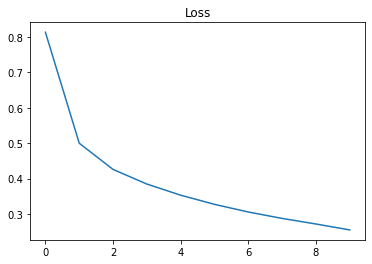

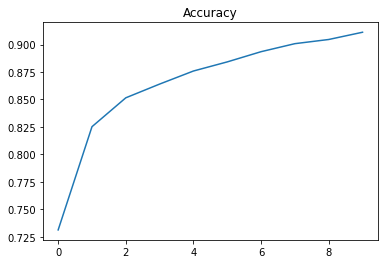

In [138]:
#Affichage des resultats finaux
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
plt.plot(loss_curve)
plt.title("Loss")
plt.show()
plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()